# Linearna regresija sa težinama

U zadatku linearne regresije sa težinama umesto kvadratne sume reziduala minimizuje se njihova težinska suma $$L(\beta, \omega) = \sum_{i=1}^{N}\omega_i(y_i-x_i\beta)^2$$ 
Koeficijenti $w_i$ predstavljaju težine koje se pridružuju rezidualima (instancama), a za vrednosti $\omega_i=1$ dobija se polazni oblik linearne regresije. 
<br>

Neke od motivacija za razmatranje ovog pristupa su: 
* visoka tačnost za pojedinjene instance skupa podataka, na primer, one koje su jako česte u skupu ili koje imaju svoj važan značaj 
* smanjenje nepreciznosti usled narušenih uslova principa maksimalne verodostojnosti

Algebarska forma rešenja ovog problema je $\beta = (X^TWX)^{-1}X^TWy$ u kojem je matrica $W$ matrica težina sa vrednostima $w_1$, ... $w_N$ na glavnoj dijagonali.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import linear_model

In [2]:
np.random.seed(1)

Da bismo simulirali rad sa ovim tipom regresije, uvešćemo jedan jednodimenzioni sintetički skup podataka oblika $y=3-2x$ uz dodatak šuma. Šum će imati normalnu raspodelu, ali će za razliku od dosadašnjih primera imati standardnu devijaciju koja zavisi od vrednosti ciljne promenljive. Na ovaj način postići ćemo `heteroskedastičnost` u skupu.
<img src='assets/heteroscedasticity_2.png'>

`Heteroskedastičnost` je pojava koja opisuje porast varijanse ciljne promenljive sa porastom vrednosti atributa. U situacijama kada je varijansa ciljne promenljive mala, sigurni smo da model može naučiti da dobro predviđa vrednosti ciljne promenljive. Međutim, ukoliko je varijansa velika, nije realno očekivati da model može dobro da pokrije ceo mogući opseg vrednosti.  

Osnovna pretpostavka u modelovanju linearnom regresijom je da je varijansa ciljne promenljive konstantna tj. da je skup podataka sa kojim se radi `homoskedastičan`.   

<img src='assets/homoscedasticity.png'>

Ova pretpostavka se može interpretirati i kao osbina da su greške koje model pravi nezavisne slučajne promenljive sa nultom srednjom vrednošću i konstantnom varijansom. Zato se u ispitivanju osobina skupa podataka mogu pratiti i grafici reziduala. 

<img src='assets/residual_plots.png'> 

Promenljiva `N` će predstavljati broj instanci skupa.

In [3]:
N = 100

Vrednost atributa biraćemo iz normalne raspodele $N(0, 9)$.

In [4]:
x = np.random.normal(0, 9, N) 

Šum koji ćemo dodati će biti oblika $1+\frac{1}{2}x^2$ tj. imaće veću vrednost za veće vrednosti atributa $x$.

In [5]:
noise = np.random.normal(0, 1+0.5*x**2, N)

Ciljna promenljiva će imati vrednost $y=3-2x$ uz dodatak šuma.

In [6]:
y = 3 - 2*x + noise

Naučićemo model linearne regresije nad ovim skupom podataka korišćenjem `LinearRegression` klase.

In [7]:
model = linear_model.LinearRegression()
model.fit(x.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
beta0 = model.intercept_
beta1 = model.coef_[0]

In [9]:
beta0, beta1

(8.036027982523336, 0.03443904911326861)

Zatim ćemo prikazati kako izgleda prava čiji smo oblik naučili.

In [10]:
y_model = model.predict(x.reshape(-1, 1))

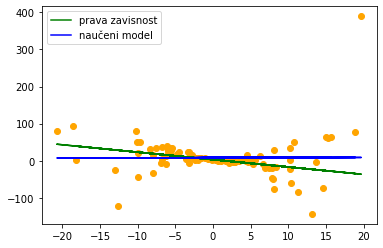

In [11]:
plt.plot(x, y, 'o', color = 'orange')
plt.plot(x, 3-2*x, color = 'green', label='prava zavisnost')
plt.plot(x, beta0 + beta1*x, color = 'blue', label='naučeni model')
plt.legend(loc='best')
plt.show()

Prikazaćemo i grafike reziduala. 

In [12]:
residuals = y-y_model

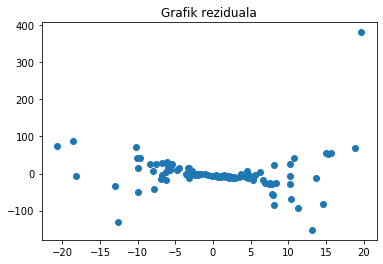

In [13]:
plt.scatter(x, residuals)
plt.title('Grafik reziduala')
plt.show()

### Linearni model sa težinama

Sada ćemo kreirati model linearne regresije sa težinama. Ideja je da instancama kod kojih je varijansa mala pridružimo veće težine kako bi model bio sigurniji, a da instancama kod kojih je varijansa velika pridružimo manje težine. Zato za vrednosti težina možemo uzeti recipročnu vrednost varijanse: $w_i = \frac{1}{\sigma_i^2}$.

In [14]:
improved_model = linear_model.LinearRegression()

In [15]:
weights=1/(1+0.5*x**2)

Prilikom poziva metode `fit` moguće je zadati vrednosti težina pojedinačnih instanci parametrom `sample_weight`.

In [16]:
improved_model.fit(x.reshape(-1,1) , y, sample_weight=weights)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
beta0_improved = improved_model.intercept_
beta1_improved = improved_model.coef_[0]

Prikazaćemo i grafik ovako naučenog modela i grafik njegovih kvadrata reziduala.

In [18]:
y_imporved_model = improved_model.predict(x.reshape(-1, 1))

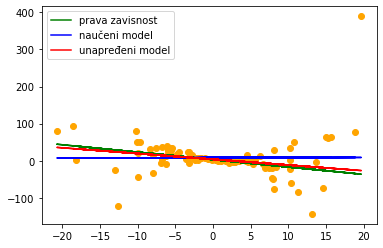

In [19]:
plt.plot(x, y, 'o', color = 'orange')
plt.plot(x, 3-2*x, color = 'green', label='prava zavisnost')
plt.plot(x, beta0 + beta1*x, color = 'blue', label='naučeni model')
plt.plot(x, beta0_improved + beta1_improved*x, color = 'red', label='unapređeni model')

plt.legend(loc='best')
plt.show()